In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
dataset = "SPECT"

In [27]:
df = pd.read_csv(dataset + '.csv')
df.sample(frac=1)
df.head()

,Class,Attr_1,Attr_2,Attr_3,Attr_4,Attr_5,Attr_6,Attr_7,Attr_8,Attr_9,...,Attr_13,Attr_14,Attr_15,Attr_16,Attr_17,Attr_18,Attr_19,Attr_20,Attr_21,Attr_22
0,Yes,0,0,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
1,Yes,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
2,Yes,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,Yes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,Yes,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0


In [28]:
if dataset == "SPECT":
    X = df.iloc[:, 1:].values
    y = df.iloc[:, 0:1].values
    y = np.where(y == 'Yes', 1, 0)
elif dataset == "IRIS":
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1:].values
    y = np.where(y == 'Iris-setosa', 1, 0)

In [29]:
y.shape

(267, 1)

In [30]:
class Perceptron(object):
    def __init__(self, rate=0.01, num_iter=10):
        self.rate = rate
        self.num_iter = num_iter

    def fit(self, X, y):
        self.weight = np.full(1 + X.shape[1], 1.0 / (X.shape[1] + 1))

        self.errors = []

        for _ in range(self.num_iter):
            err = 0
            for xi, target in zip(X, y):
#                 print(self.predict(xi), target)
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
            if err == 0:
                break
        return self

    def net_input(self, X):
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

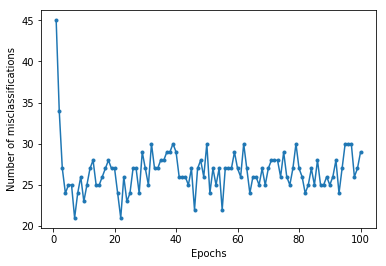

In [31]:
pn = Perceptron(0.005, 100)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [32]:
print("Final Test Accuracy: {}".format((pn.predict(X) == y).mean()))

Final Test Accuracy: 0.42181823282694386


In [33]:
def evalu(X,y,ptr):
    pn = Perceptron(0.005, 100)
    pn.fit(X[:ptr], y[:ptr])
    print("Final Test Accuracy: {}".format((pn.predict(X[ptr:]) == y[ptr:]).mean()))

In [34]:
def crossval(X,y,n):
    l = len(X)
    part = l//n
    ptr = part
    for i in range(n):
        evalu(X,y,ptr)
        ptr += part

In [35]:
crossval(X,y,10)

Final Test Accuracy: 0.7717842323651453
Final Test Accuracy: 0.6381395348837209
Final Test Accuracy: 0.38935080204921474
Final Test Accuracy: 0.5926079265309195
Final Test Accuracy: 0.7650913740742714
Final Test Accuracy: 0.7728268809349891
Final Test Accuracy: 0.7169550173010381
Final Test Accuracy: 0.7124389543234703
Final Test Accuracy: 0.5344352617079889
Final Test Accuracy: 0.42857142857142855
